In [22]:
### import packages

## lets basic import packages
from tkinter import *
from tkinter import messagebox

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from pandas_profiling import ProfileReport


from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier  

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

In [23]:

#importing the dataset

data= pd.read_csv('dp_dataset.csv')
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#remove ('_') underscore and ' ' in the text

for col in data.columns:
    data[col] = data[col].str.replace('_', ' ')

data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning movements,loss of balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning micturition,bladder discomfort,foul smell of urine,continuous feel of urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:

#data preprocessing

# check for null values from the dataset

null_checker = data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


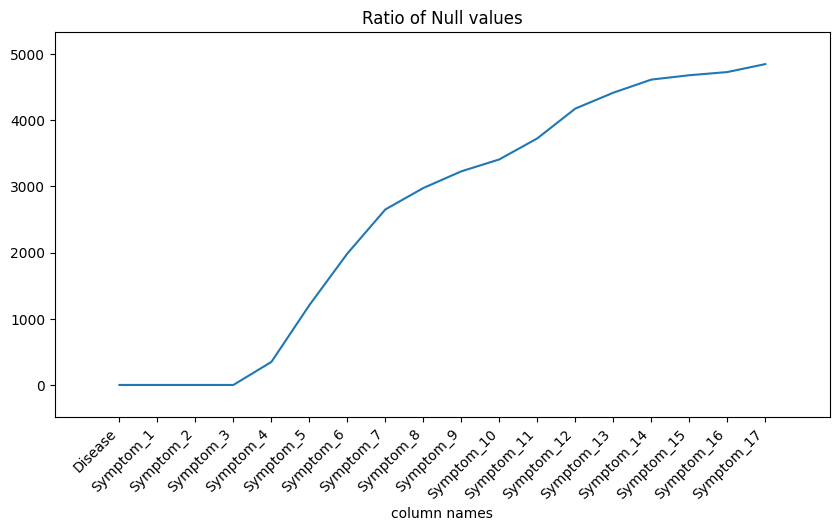

In [26]:

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()


In [27]:

#clean the null values

data=data.fillna(0)
data.isna().sum()


Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

In [28]:
cols= data.columns
data1= data[cols].values.flatten()

reshaped = pd.Series(data1)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(data.shape)

data = pd.DataFrame(reshaped, columns = data.columns)
data.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [30]:
## lets explore symptom severity

Symptom_severity = pd.read_csv('dp_ss.csv')

Symptom_severity

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [31]:
Symptom_severity['Symptom'] =Symptom_severity['Symptom'].str.replace('_',' ')
Symptom_severity.head(15)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [32]:
# lets encode sysptoms in the data

vals = data.values
symptoms =Symptom_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = Symptom_severity[Symptom_severity['Symptom'] == symptoms[i]]['weight'].values[0]

symptoms

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [33]:
data_processed = pd.DataFrame(vals, columns=cols)
data_processed=data_processed.fillna(0)
data_processed.head(20)

/tmp/ipykernel_519/2699304821.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_processed=data_processed.fillna(0)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
## assign symptoms with no rank to zero

data_processed = data_processed.replace('dischromic  patches', 0)
data_processed = data_processed.replace('spotting  urination', 0)
data_processed = data_processed.replace('foul smell of urine', 0)
data_processed

/tmp/ipykernel_519/4121263225.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_processed = data_processed.replace('spotting  urination', 0)
/tmp/ipykernel_519/4121263225.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_processed = data_processed.replace('foul smell of urine', 0)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [35]:

# charactieristics of data

data_processed.describe()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,3.410976,4.147561,4.043902,3.828049,3.114634,2.654878,2.059756,1.712195,1.554878,1.304878,0.979268,0.702439,0.492683,0.323171,0.282927,0.136585,0.029268
std,1.316310,1.232387,1.390184,1.921436,2.169638,2.384472,2.340259,2.244483,2.250034,2.061402,1.880334,1.799707,1.529126,1.305543,1.298518,0.719747,0.240191
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,2.000000


In [36]:
#extracting features (x variable) and target (y variable)

x= data_processed.iloc[:,1:]

# target is the types of disease

y=data_processed[['Disease']]
np.ravel(y)



array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [37]:
# # # split train and test data

# # Define test size and interval
test_size = 0.2
interval = 5

# # Calculate the number of test samples based on test size and data size
n_test = int(test_size * len(data_processed))

# # Create a list to store test indices
test_indices = list(range(4, n_test * interval + 4, interval))

# # Split data into x (features) and y (target)
x = data_processed.iloc[:, 1:]  # Assuming features are from column 2 onwards
y = data_processed.iloc[:, 0]  # Assuming target is in the first column

# # Split data into test and training sets
xtest = x.iloc[test_indices]
ytest = y.iloc[test_indices]
xtrain = x.drop(test_indices)
ytrain = y.drop(test_indices)

# # Verify test size
print(f"Test size: {len(xtest)}/{len(data_processed)} ({test_size * 100:.2f}%)")

# # Optional: Print sample test data
print("\nSample test data (x):")
print(xtest.head(20))
print("\nSample test data (y):")
print(ytest.head(20))



Test size: 984/4920 (20.00%)

Sample test data (x):
    Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
4           1          3          4          0          0          0   
9           1          3          4          0          0          0   
14          4          5          3          0          0          0   
19          4          5          3          4          0          0   
24          5          3          4          5          7          0   
29          5          3          4          4          7          0   
34          1          5          3          4          4          4   
39          1          5          3          5          4          4   
44          1          3          5          6          0          0   
49          1          3          5          6          0          0   
54          5          5          4          5          4          0   
59          5          5          4          4          5          4   
64          

In [40]:
# export test data

test_data = pd.concat([xtest, ytest], axis=1)
test_data.to_csv('test_dp_dataset.csv', index=False)

In [41]:
#performance testing

def performance (model, xtest, ytest):
    precision = precision_score(ytest,predict,average='micro')*100

    accuracy = accuracy_score(ytest,predict)*100

    f1 = f1_score(ytest,predict, average='macro')*100

    recall = recall_score(ytest,predict, average='macro')*100

    print('precision----->', precision) 
    print('\n************************')
    print('Accuracy----->', accuracy)
    print('\n************************')
    print('F1 Score----->', f1)
    print('\n************************')
    print('Recall----->', recall)
    print('\n************************')
    return accuracy, precision, f1, recall

In [42]:
# Machine Learning Algorithms

# 1) Naive_bayes

model=GaussianNB()
model.fit(xtrain,ytrain.values.ravel())
predict=model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 89.63414634146342

************************
Accuracy-----> 89.63414634146342

************************
F1 Score-----> 88.64498644986449

************************
Recall-----> 89.63414634146342

************************


(89.63414634146342, 89.63414634146342, 88.64498644986449, 89.63414634146342)

In [43]:

# 2) SVR

model=SVC(kernel='linear')
model.fit(xtrain,ytrain.values.ravel())
predict=model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 93.90243902439023

************************
Accuracy-----> 93.90243902439023

************************
F1 Score-----> 93.79210220673635

************************
Recall-----> 93.90243902439023

************************


(93.90243902439023, 93.90243902439023, 93.79210220673635, 93.90243902439023)

In [44]:
# 3) RandomForest


model= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(xtrain, ytrain.values.ravel()) 
predict=model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 93.90243902439023

************************
Accuracy-----> 93.90243902439023

************************
F1 Score-----> 93.7591947348045

************************
Recall-----> 93.90243902439023

************************


(93.90243902439023, 93.90243902439023, 93.7591947348045, 93.90243902439023)

In [45]:
# 4) GradientBoostingClassifier

model=GradientBoostingClassifier(learning_rate=0.2)
model.fit(xtrain,ytrain.values.ravel())
predict=model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 96.95121951219512

************************
Accuracy-----> 96.95121951219512

************************
F1 Score-----> 96.84088269454124

************************
Recall-----> 96.95121951219512

************************


(96.95121951219512, 96.95121951219512, 96.84088269454124, 96.95121951219512)

In [46]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [47]:
newresult=model.predict([[3,4,7,4,3,6,5,7,5,4,0,0,0,0,0,0,0]])
print(newresult)

['Pneumonia']


/home/momi75/miniconda3/envs/bmg5109/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


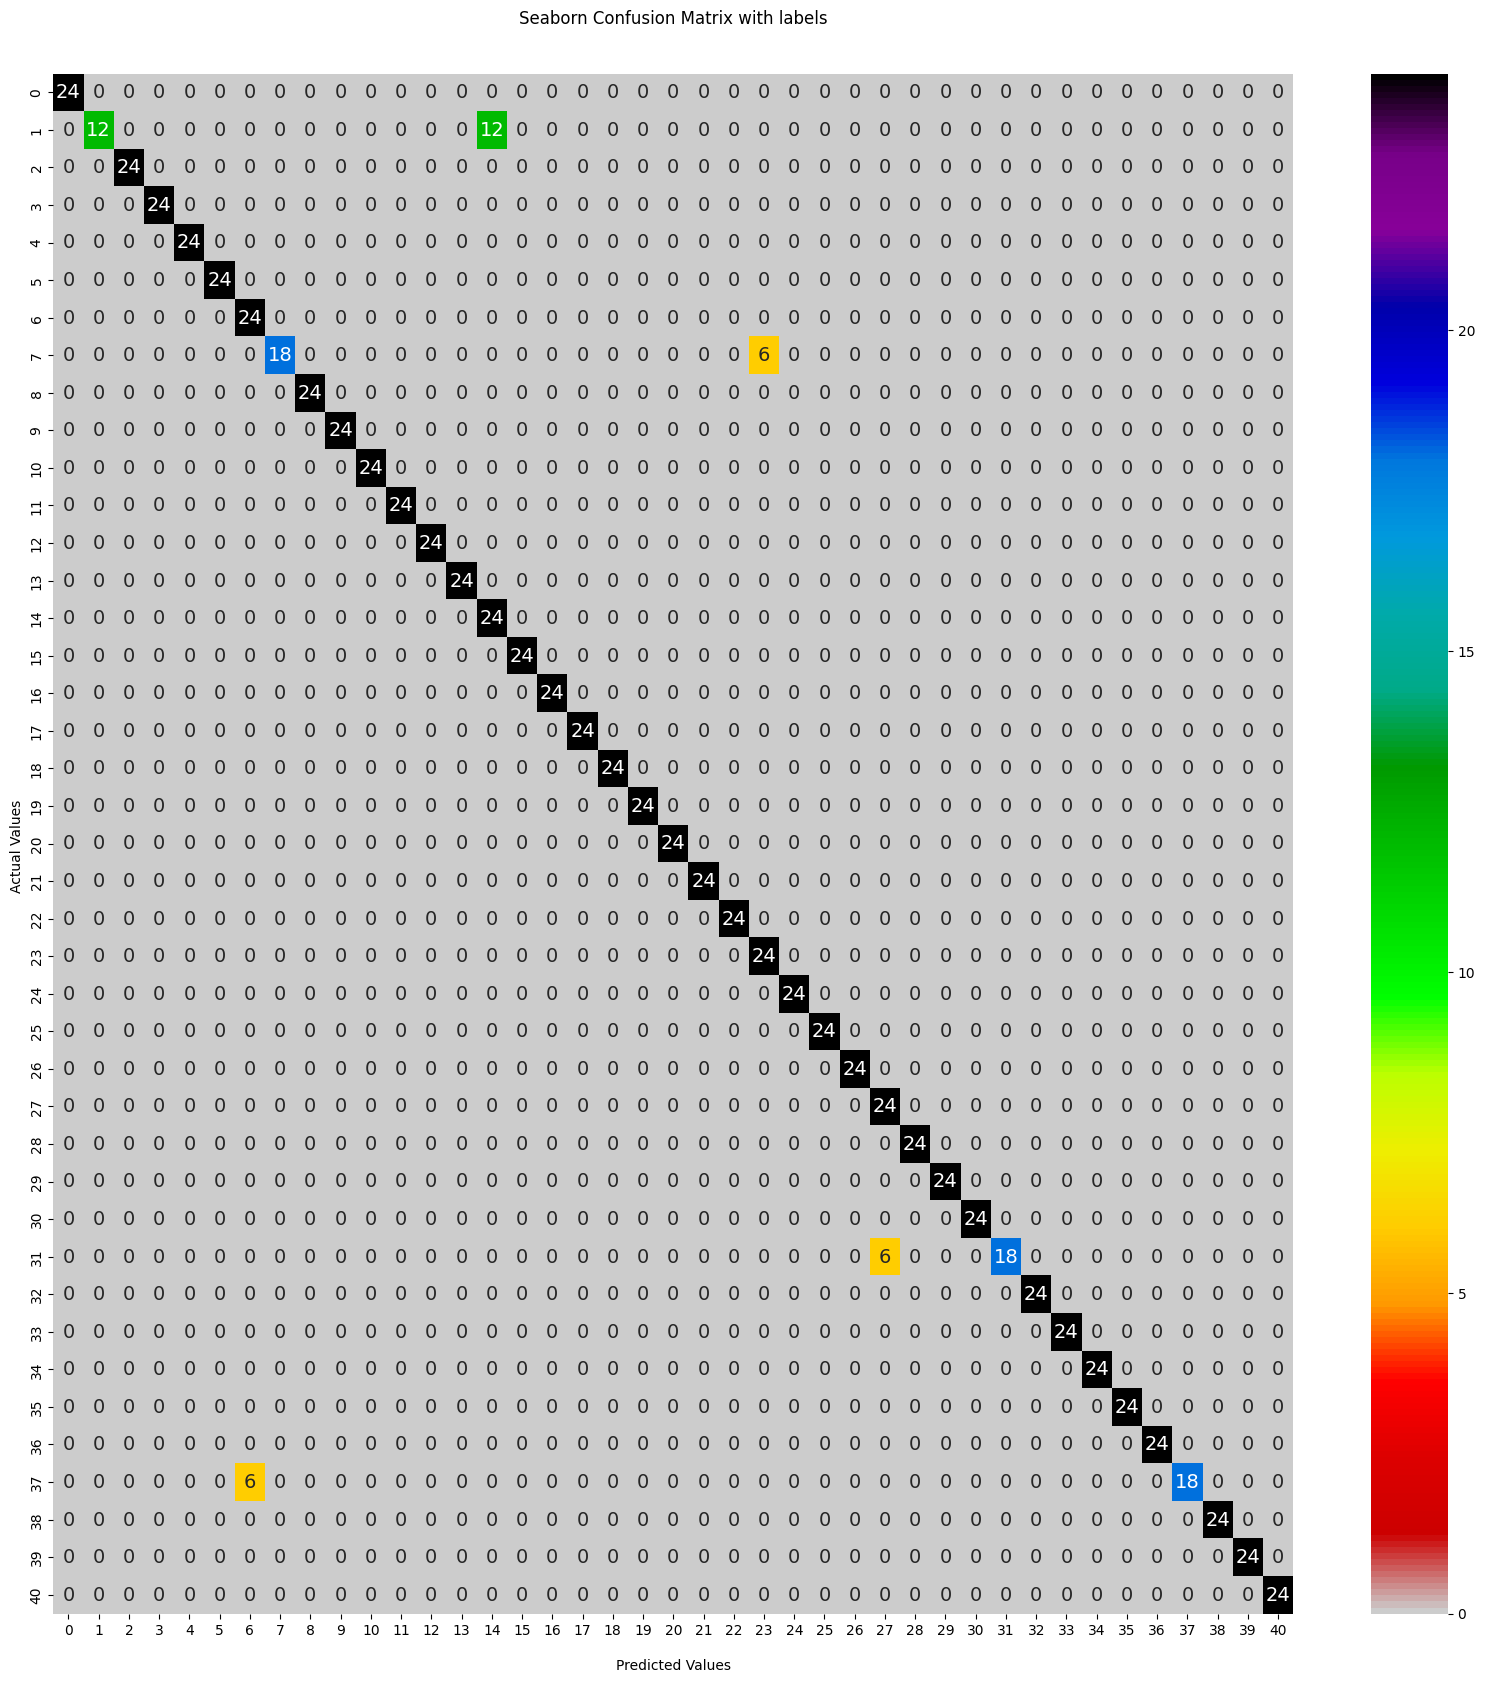

In [48]:
## Display the visualization of the Confusion Matrix.

cf_matrix=confusion_matrix(ytest,predict)
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(cf_matrix, annot=True, cmap='nipy_spectral_r', annot_kws={'fontsize': 14})
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()
